In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Visualisation

In [5]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin1')

- Why was the encoding changed to 'latin1'?

In [6]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [7]:
df['Stage'].value_counts()

1    79
2    56
3    16
Name: Stage, dtype: int64

In [8]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


- We notice that there is missing data in the Type 2 feature.
- What can be done about this?

In [10]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


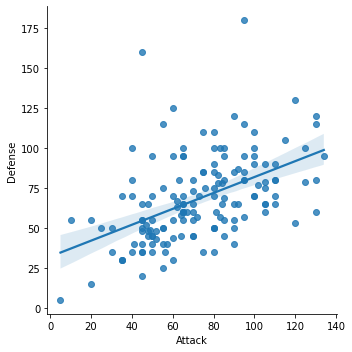

In [11]:
sns.lmplot(x='Attack', y='Defense', data=df)

(0.0, 150.0)

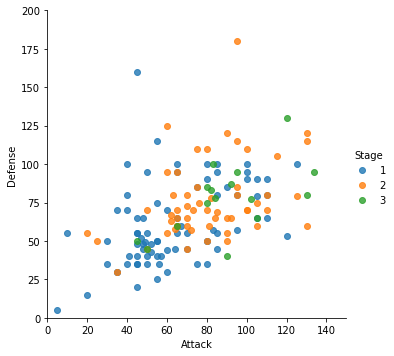

In [12]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak axes using Matplotlib
plt.ylim(0, 200)
plt.xlim(0, 150)

<AxesSubplot:>

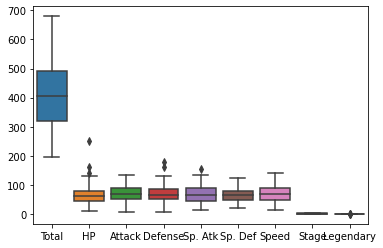

In [15]:
# Boxplot
sns.boxplot(data=df)

<AxesSubplot:>

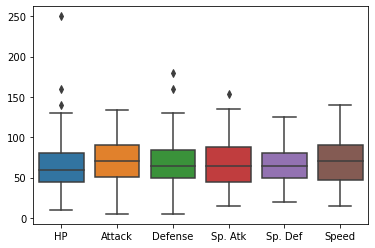

In [14]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Breakdown of the Boxplot
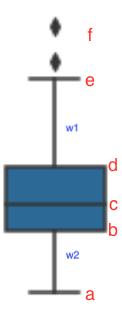

### Breakdown:
- **c** -> median (Q2/50th Percentile): the middle value in the dataset.
- **b** -> first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- **d** -> third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- **w1 & w2** -> whiskers (identified in blue)
- **f** -> outliers (shown as black diamonds)
- **IQR** -> Q1 to Q3
- **e** -> "maximum": Q3 + (1.5*IQR)
- **a** -> "minimum": Q1 - (1.5*IQR)
<hr>
- If we **assume that our data is normally distributed**, **e and a** would be +/-2.698 deviations from the mean of the data. This transalates into us being able to capture 99.3% of the data within the boxplot.

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

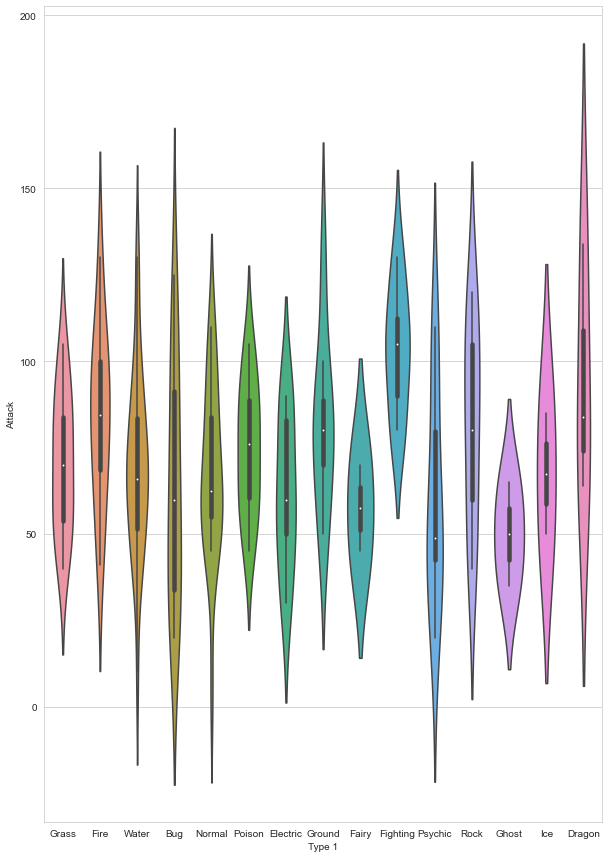

In [16]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.subplots(figsize=(10,15))
sns.violinplot(x='Type 1', y='Attack', data=df)

- The violin plot is complementary to the box plot in the sense that it reveals the structure of the data through variation in density of each violin (given that we have sufficient data points).

In [17]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

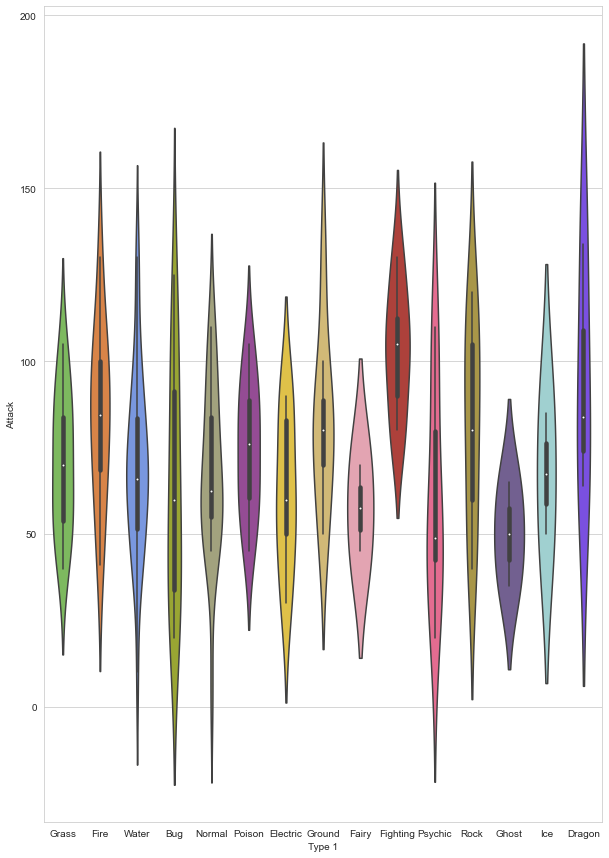

In [18]:
# Violin plot with Pokemon color palette
plt.subplots(figsize=(10,15))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

In [20]:
df[df['Type 1'] == "Dragon"]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

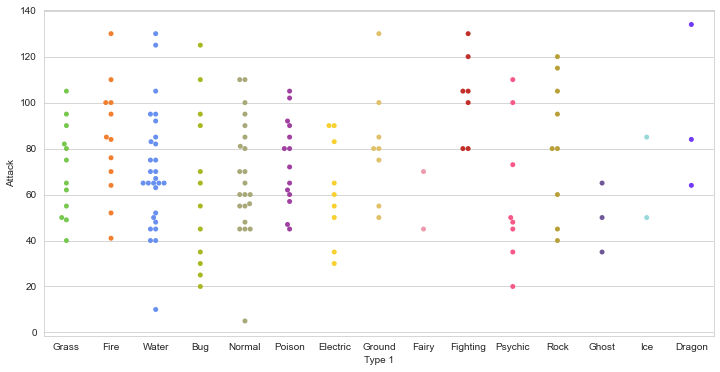

In [21]:
# Swarm plot with Pokemon color palette
plt.subplots(figsize=(12,6))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

- Swarmplots are a good complement to a box or violin plot. It showcases all observations along with some representation of the underlying distribution.

Text(0.5, 1.0, 'Attack by Type')

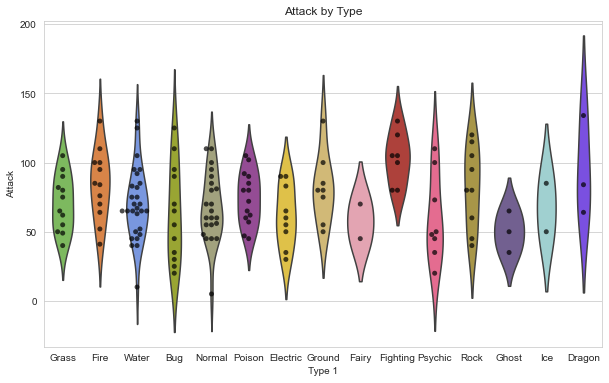

In [25]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [26]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


- It is quite common to have data expressed in this format; attack, defense, etc. are in their respective columns.
- It is quite often difficult to perform analysis on data in this format.
- We can use the function melt from the pandas library to turn these columns into rows.

In [27]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head(5)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [29]:
melted_df[melted_df['Name'] == "Bulbasaur"]

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


In [30]:
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

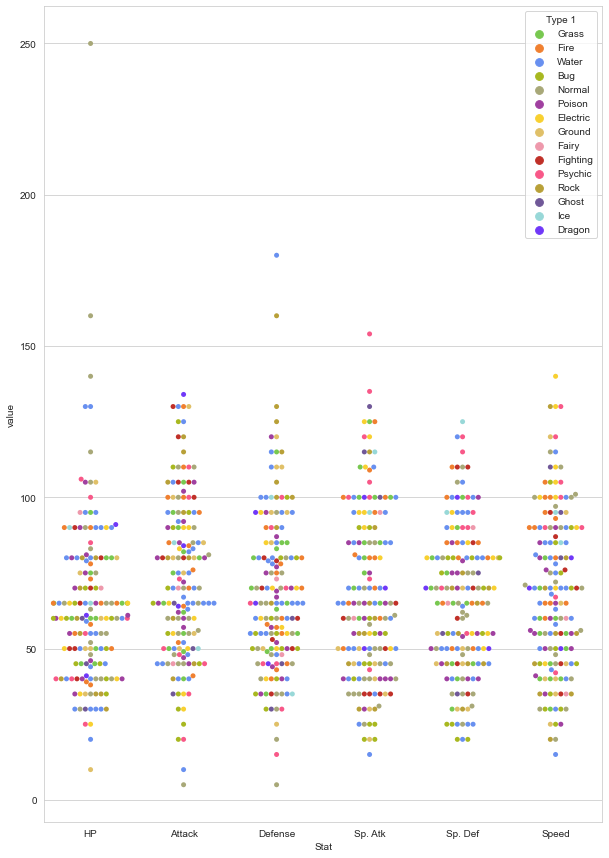

In [32]:
plt.subplots(figsize=(10,15))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1', palette=pkmn_type_colors)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size o

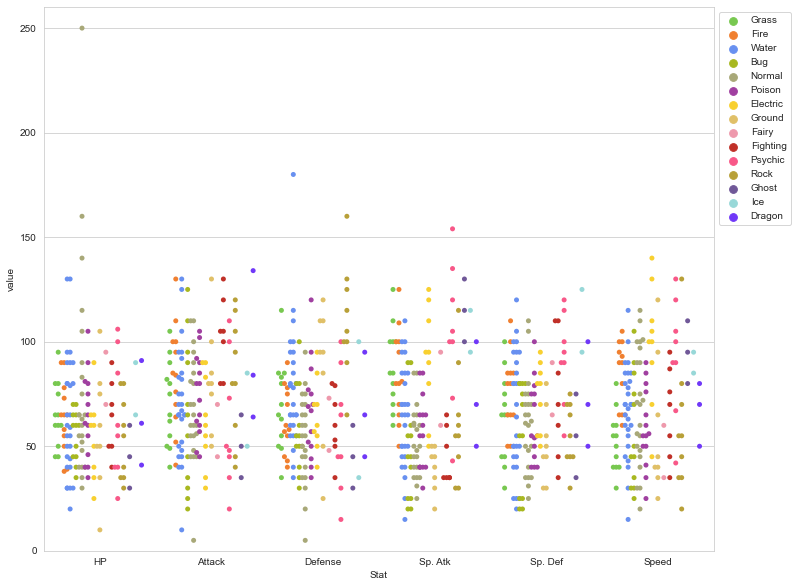

In [35]:
# 1. Enlarge the plot
plt.figure(figsize=(12,10))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:>

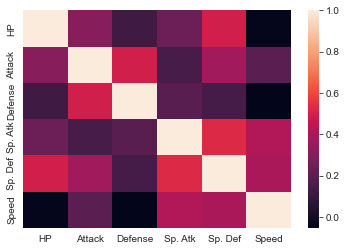

In [36]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

- Using corr() allows us to compute the pairwise correlation of columns (the default method used is Pearson's Correlation).
- The values lie between 1 and -1 (inclusive).
- The value indicates the extent at which the data is **linearly related**.
- +1 indicates that there exists a perfect positive linear relationship between two variables, say x and y. In summary, larger x values corresponds to larger y values and vice versa.
- -1 is the opposite of the statement above.

In [37]:
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

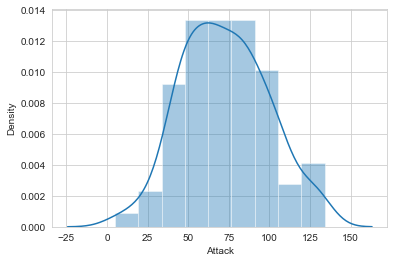

In [42]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df['Attack'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Defense', ylabel='Density'>

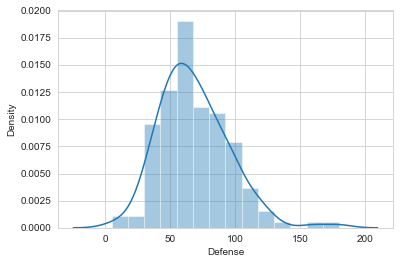

In [43]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Defense)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

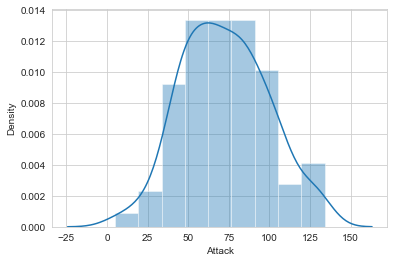

In [44]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

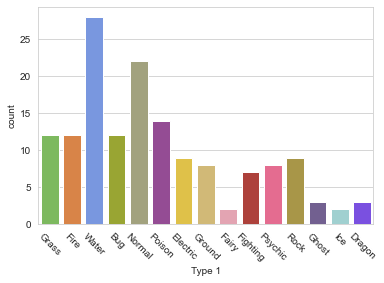

In [48]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


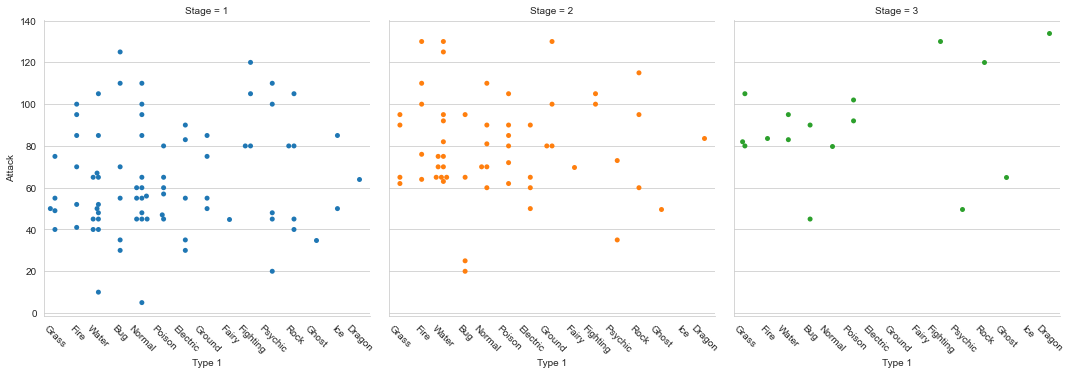

In [52]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

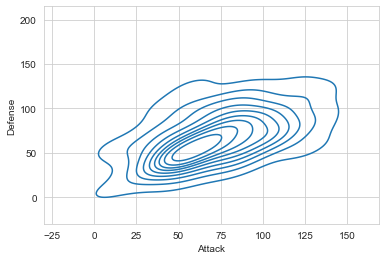

In [53]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

- Plot univariate or bivariate distributions using kernel density estimation.
- In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
- https://mathisonian.github.io/kde/

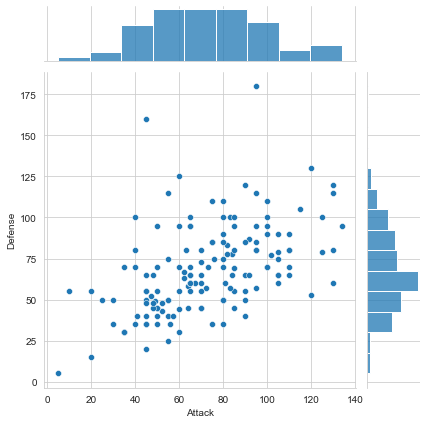

In [54]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

### Scraping

- We want to extract a large amount of data from a website. How do we do this quickly without having to manually copy and paste data?
- Really good tutorial and introduction on the package BeautifulSoup: https://realpython.com/beautiful-soup-web-scraper-python/.
- It should be noted that we are referencing some of the code was adapted in the preceeding link.
- Additional resource 1: https://www.w3schools.com/tags/ref_httpmethods.asp.
- Additional resource 2: https://hackernoon.com/how-post-requests-with-python-make-web-scraping-easier-9i203511.

In [60]:
!ls -alh

total 2192
drwxr-xr-x   6 shivaramoudith  staff   192B Feb  2 19:26 .
drwxr-xr-x  10 shivaramoudith  staff   320B Jan 30 13:36 ..
-rw-r--r--@  1 shivaramoudith  staff   6.0K Jan 30 09:07 .DS_Store
drwxr-xr-x   3 shivaramoudith  staff    96B Jan 30 12:47 .ipynb_checkpoints
-rw-r--r--   1 shivaramoudith  staff   1.1M Feb  2 19:26 Lab_3.ipynb
-rw-r--r--   1 shivaramoudith  staff   7.8K Jan 30 13:39 Pokemon.csv


In [55]:
!pip install requests beautifulsoup4

- We would like to scrape data from this website: https://realpython.github.io/fake-jobs/; namely the job listings that are available along with their corresponding details.
- Open the website in your browser and take a look.
- What we need to do now is obtain an understanding of the structure of the page in html. <br>On Chrome, navigate to Options -> More Tools -> Developer Tools.

In [61]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

In [62]:
results = soup.find(id="ResultsContainer")

In [64]:
job_elements = results.find_all("div", class_="card-content")

In [65]:
for job_element in job_elements:
    print(job_element, end="\n"*2)

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://fi

In [67]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    datetime_element = job_element.find("p", class_="is-small has-text-grey")
    print(title_element)
    print("\n")
    print(company_element)
    print("\n")
    print(location_element)
    print("\n")
    print(datetime_element)
    print("\n")
    print("=====================\n")

<h2 class="title is-5">Senior Python Developer</h2>


<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>


<p class="location">
        Stewartbury, AA
      </p>


<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>



<h2 class="title is-5">Energy engineer</h2>


<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>


<p class="location">
        Christopherville, AA
      </p>


<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>



<h2 class="title is-5">Legal executive</h2>


<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>


<p class="location">
        Port Ericaburgh, AA
      </p>


<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>



<h2 class="title is-5">Fitness centre manager</h2>


<h3 class="subtitle is-6 company">Savage-Bradley</h3>


<p class="location">
        East Seanview, AP
      </p>


<p class="is-small has-text-grey">
<time da

- How do we extract the desired text from the html tags? 

In [68]:
def extract_and_strip_text(element):
    return element.text.strip()

for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    datetime_element = job_element.find("p", class_="is-small has-text-grey")
    print(title_element.text)
    print(extract_and_strip_text(company_element))
    print(extract_and_strip_text(location_element))
    print(extract_and_strip_text(datetime_element))
    print("\n")

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
2021-04-08


Energy engineer
Vasquez-Davidson
Christopherville, AA
2021-04-08


Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA
2021-04-08


Fitness centre manager
Savage-Bradley
East Seanview, AP
2021-04-08


Product manager
Ramirez Inc
North Jamieview, AP
2021-04-08


Medical technical officer
Rogers-Yates
Davidville, AP
2021-04-08


Physiological scientist
Kramer-Klein
South Christopher, AE
2021-04-08


Textile designer
Meyers-Johnson
Port Jonathan, AE
2021-04-08


Television floor manager
Hughes-Williams
Osbornetown, AE
2021-04-08


Waste management officer
Jones, Williams and Villa
Scotttown, AP
2021-04-08


Software Engineer (Python)
Garcia PLC
Ericberg, AE
2021-04-08


Interpreter
Gregory and Sons
Ramireztown, AE
2021-04-08


Architect
Clark, Garcia and Sosa
Figueroaview, AA
2021-04-08


Meteorologist
Bush PLC
Kelseystad, AA
2021-04-08


Audiological scientist
Salazar-Meyers
Williamsburgh, AE
2021-04